Link DataSet: https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data

Carregamento e Tratamento dos Dados

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
%pip install openpyxl
warnings.filterwarnings('ignore')

# Carregando o dataset
df = pd.read_csv('Credit Card Customer Data.csv')

# Visualizando as primeiras linhas para entender as colunas disponíveis
print(df.head())

# Pré-processamento: removendo colunas irrelevantes
df = df.drop(['Sl_No', 'Customer Key'], axis=1)

# Seleção das Features Relacionadas ao Risco de Crédito
features_risco = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

# Remover linhas com valores ausentes nas features selecionadas
df_risco = df.dropna(subset=features_risco)


   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


Normalizando os Dados

In [ ]:
# Normalização dos Dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_risco[features_risco])

Usando o método do cotovelo para obter o melhor número de Klusters (K = 3)

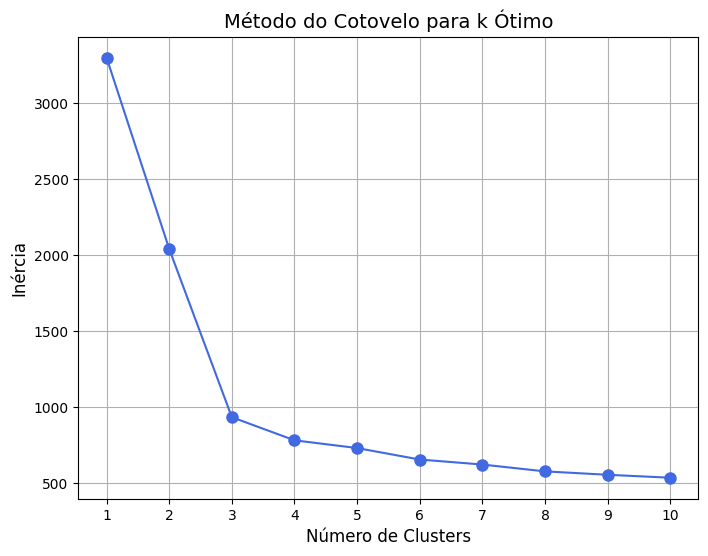

In [ ]:
# Determinação do Número Ótimo de Clusters com Método do Cotovelo
def plot_elbow_method(scaled_data):
    inertia = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(K, inertia, 'bo-', markersize=8, color='royalblue')
    plt.xlabel('Número de Clusters', fontsize=12)
    plt.ylabel('Inércia', fontsize=12)
    plt.title('Método do Cotovelo para k Ótimo', fontsize=14)
    plt.grid(True)
    plt.xticks(K)
    plt.show()

plot_elbow_method(scaled_data)

# Definindo o número de clusters com base no método do cotovelo
optimal_k = 3  # Exemplo, ajuste conforme o gráfico

Aplicando K-means com K = 3

K-Means Inertia para 3 clusters: 933.0437490000528


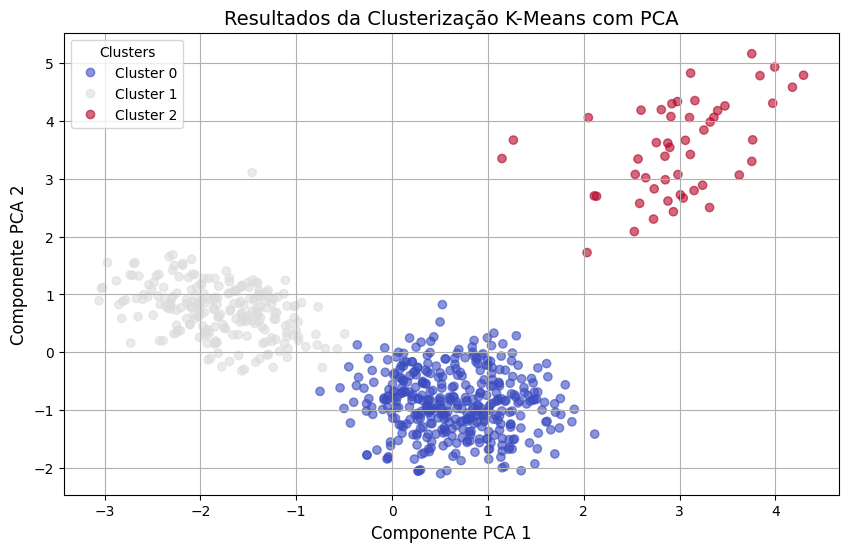

In [ ]:
# Aplicação do K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Adicionando os clusters ao DataFrame original
df_finalresult = df_risco.copy()
df_finalresult['kmeans_cluster'] = clusters

# Exibindo a inércia
inertia = kmeans.inertia_
print(f"K-Means Inertia para {optimal_k} clusters: {inertia}")

# Redução de Dimensionalidade para Visualização com PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plotagem dos Clusters com PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('Componente PCA 1', fontsize=12)
plt.ylabel('Componente PCA 2', fontsize=12)
plt.title('Resultados da Clusterização K-Means com PCA', fontsize=14)
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid(True)
plt.show()



Análise dos Componentes PC1 e PC2:PC1 (Primeira Componente Principal):

Avg_Credit_Limit: 0.488859

Total_Credit_Cards: 0.597679

Total_visits_bank: 0.280492

Total_visits_online: 0.111783

Total_calls_made: -0.559129

Total_Credit_Cards (+) e Avg_Credit_Limit (+) e Total_calls_made(-) maior influencia

PC2 (Segunda Componente Principal):

Avg_Credit_Limit: 0.403240

Total_Credit_Cards: 0.030171

Total_visits_bank: -0.586587

Total_visits_online: 0.665161

Total_calls_made: 0.223527

Total_visits_online (+) e Total_Visits_bank(-) ou seja PC2 é visitar o banco

In [ ]:
components = pca.components_
components_df = pd.DataFrame(components, columns=df.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])
print(components_df)

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
PC1          0.488859            0.597679           0.280492   
PC2          0.403240            0.030171          -0.586587   

     Total_visits_online  Total_calls_made  
PC1             0.111783         -0.559129  
PC2             0.665161          0.223527  


Comparação com outros K

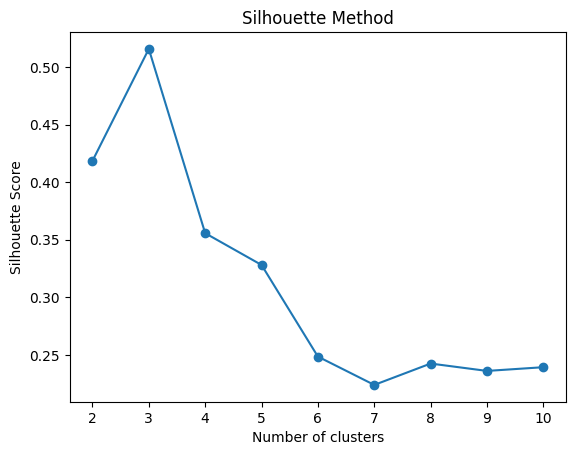

K-Means Inertia for 2 clusters: 2040.9898164784947


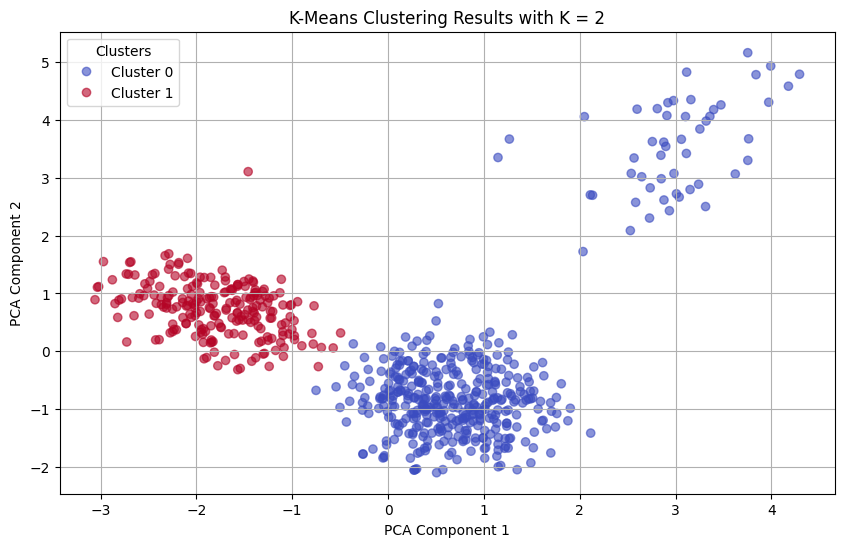

K-Means Inertia for 4 clusters: 780.7736895551773


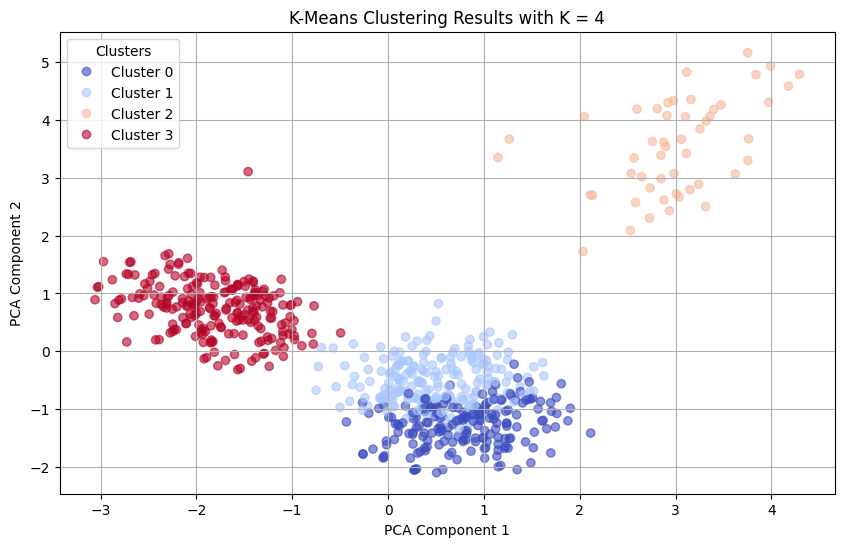

K-Means Inertia for 7 clusters: 621.1900732083062


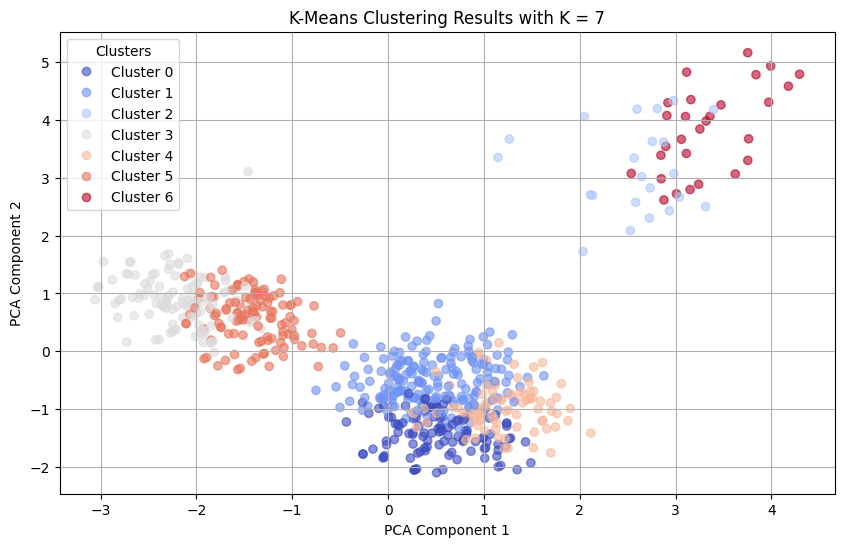

In [ ]:
silhouette_scores = []
K = range(1, 11)
for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(K[1:], silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

optimal_k = 2 ##valor obtido pelo gráfico
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
df_finalresult = pd.DataFrame(df)
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_
print(f"K-Means Inertia for {optimal_k} clusters: {inertia}")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results with K = 2')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

optimal_k = 4 ##valor obtido pelo gráfico
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
df_finalresult = pd.DataFrame(df)
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_
print(f"K-Means Inertia for {optimal_k} clusters: {inertia}")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results with K = 4')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

optimal_k = 7 ##valor obtido pelo gráfico
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
df_finalresult = pd.DataFrame(df)
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_
print(f"K-Means Inertia for {optimal_k} clusters: {inertia}")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results with K = 7')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

Analisando BoxPlot por Cluster

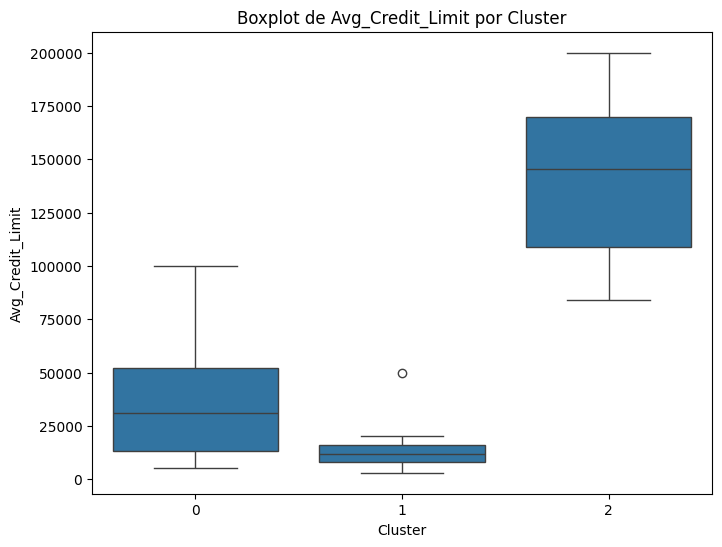

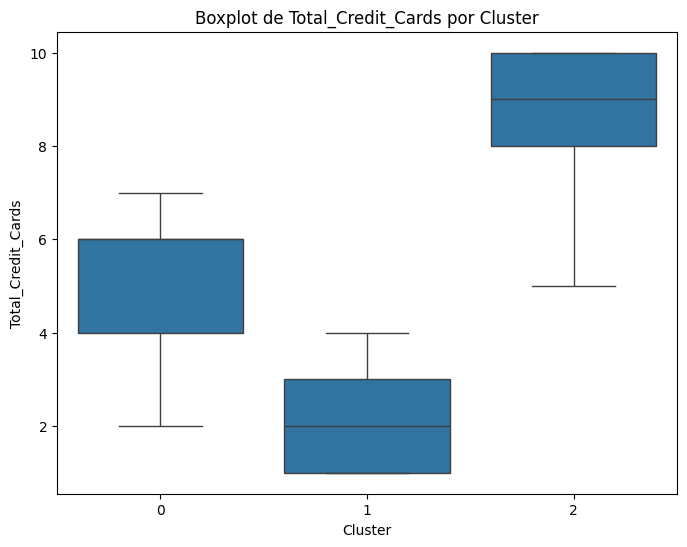

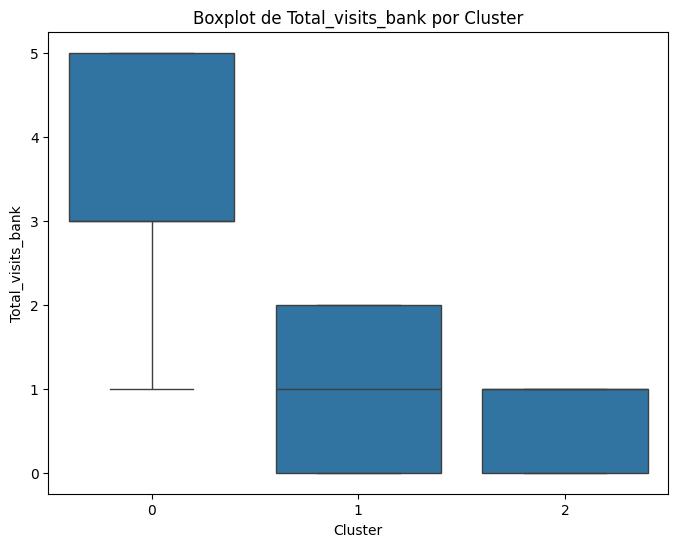

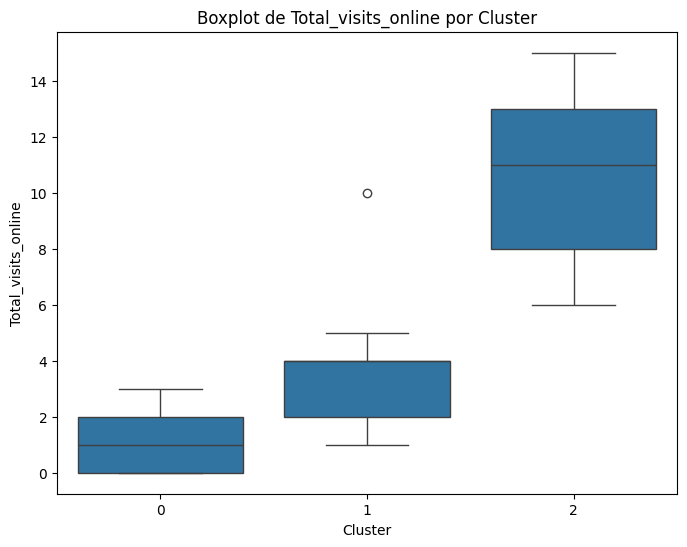

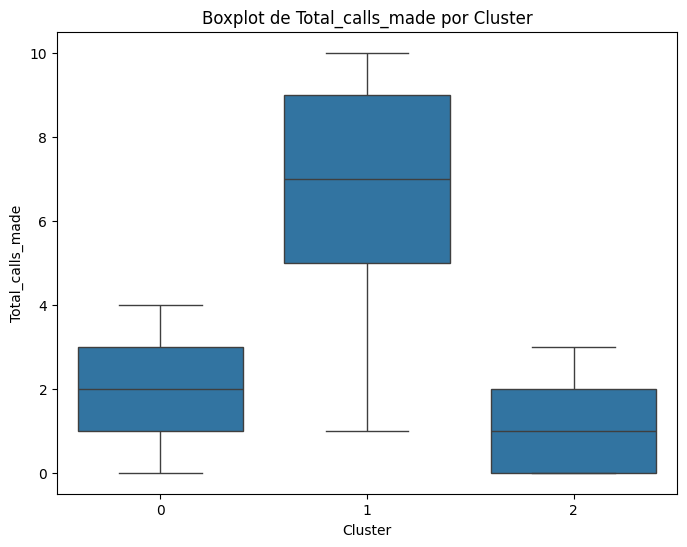

In [ ]:
optimal_k = 3  # Exemplo, ajuste conforme o gráfico

# Aplicação do K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Adicionando os clusters ao DataFrame original
df_finalresult = df_risco.copy()
df_finalresult['kmeans_cluster'] = clusters

# Análise Estatística por Cluster
cluster_summary = df_finalresult.groupby('kmeans_cluster').agg({
    'Avg_Credit_Limit': ['mean', 'median'],
    'Total_Credit_Cards': ['mean', 'median'],
    'Total_visits_bank': ['mean', 'median'],
    'Total_visits_online': ['mean', 'median'],
    'Total_calls_made': ['mean', 'median']
}).round(2)

# print(cluster_summary)

# Visualização das Características por Cluster
for feature in features_risco:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='kmeans_cluster', y=feature, data=df_finalresult)
    plt.title(f'Boxplot de {feature} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

Criando Métricas de Risco:

Quanto maior Credito, maior confiança, menor o risco

Quanto maior Quantidade de Cartao, confiança moderada, risco moderado

...


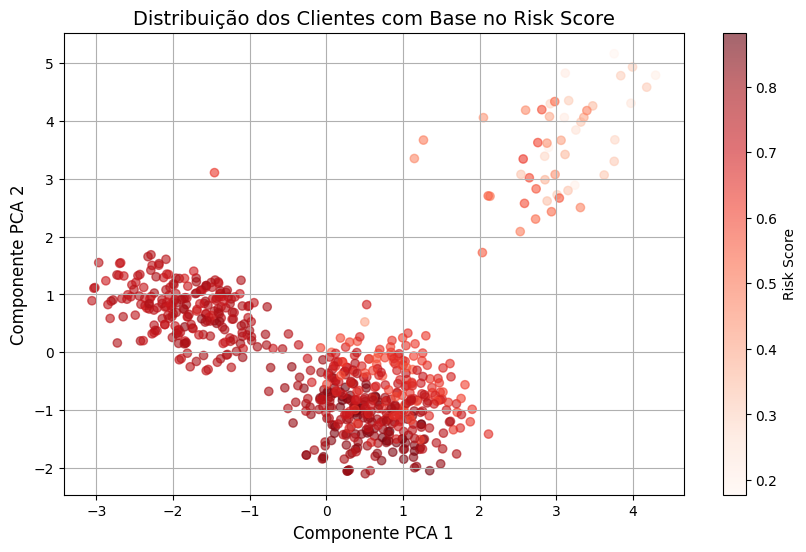

In [ ]:
# Criando uma métrica de risco simples (exemplo)
# Nota: Ajuste a fórmula conforme a lógica de negócio
df_finalresult['Risk_Score'] = (
    (1 - df_finalresult['Avg_Credit_Limit']/df_finalresult['Avg_Credit_Limit'].max()) * 0.7 +
    (df_finalresult['Total_Credit_Cards']/df_finalresult['Total_Credit_Cards'].max()) * 0.2 +
    (df_finalresult['Total_visits_bank']/df_finalresult['Total_visits_bank'].max()) * 0.05 +
    (df_finalresult['Total_calls_made']/df_finalresult['Total_calls_made'].max()) * 0.05
)
# Visualização dos Clusters com Risk_Score
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_finalresult['Risk_Score'], cmap='Reds', alpha=0.6)
plt.colorbar(scatter, label='Risk Score')
plt.xlabel('Componente PCA 1', fontsize=12)
plt.ylabel('Componente PCA 2', fontsize=12)
plt.title('Distribuição dos Clientes com Base no Risk Score', fontsize=14)
plt.grid(True)
plt.show()

# Salvando os resultados com os clusters e Risk_Score
df_finalresult.to_excel('Credit_Risk_Clusters.xlsx', index=False)

Cluester 0

Perfil de crédito mediano, com médio número de cartões de crédito e limites moderados
Tem o perfil de visitar mais o banco, podendo ser talvez um grupo com maior idade ou querem ter um melhor relacionamento com o banco

Cluester 1

Grupo de maior risco, pois apresentam menor crédito liberado e o menor número de cartões de crédito. O que diz que não tem um "Bom nome na praça". Além, o alto número de ligaçôes indica que estão sendo cobrados constantemente.

Cluester 2

Menor risco, Maiores limites de créditos e maior número de cartões o que indica que os bancos confiam mais neles. Vão pouco ao banco e recebem poucas chamadas e estão controlando suas vidas fiancneiras online